Let's solve a rubik's cube.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

class Cube:
    def __init__(self):
        self.cube = np.reshape(np.outer(np.outer(np.arange(1,6),np.arange(1,6)),np.arange(1,6)),(5,5,5))

    @property
    def f(self):
        self.cube[-1] = np.flip(self.cube[-1].T,1)
        return self

In [2]:
c = Cube()
c.f.f.cube[-1]

array([[125, 100,  75,  50,  25],
       [100,  80,  60,  40,  20],
       [ 75,  60,  45,  30,  15],
       [ 50,  40,  30,  20,  10],
       [ 25,  20,  15,  10,   5]])

In [182]:
# front clockwise
np.flip(h[-1].T,1)

array([[ 25,  20,  15,  10,   5],
       [ 50,  40,  30,  20,  10],
       [ 75,  60,  45,  30,  15],
       [100,  80,  60,  40,  20],
       [125, 100,  75,  50,  25]])

In [183]:
# front counter clockwise
np.flip(h[-1].T,0)

array([[ 25,  50,  75, 100, 125],
       [ 20,  40,  60,  80, 100],
       [ 15,  30,  45,  60,  75],
       [ 10,  20,  30,  40,  50],
       [  5,  10,  15,  20,  25]])

In [179]:
# top clockwise
np.flip(h[:,:1].T,-1)

array([[[ 5,  4,  3,  2,  1]],

       [[10,  8,  6,  4,  2]],

       [[15, 12,  9,  6,  3]],

       [[20, 16, 12,  8,  4]],

       [[25, 20, 15, 10,  5]]])

In [180]:
# top counter clockwise
np.flip(h[:,:1].T,0)

array([[[ 5, 10, 15, 20, 25]],

       [[ 4,  8, 12, 16, 20]],

       [[ 3,  6,  9, 12, 15]],

       [[ 2,  4,  6,  8, 10]],

       [[ 1,  2,  3,  4,  5]]])

In [197]:
# side clockwise
np.rot90(h[:,:,:1],axes=(0,1))

array([[[ 5],
        [10],
        [15],
        [20],
        [25]],

       [[ 4],
        [ 8],
        [12],
        [16],
        [20]],

       [[ 3],
        [ 6],
        [ 9],
        [12],
        [15]],

       [[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]],

       [[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5]]])

In [198]:
# side counter clockwise
np.rot90(h[:,:,:1],axes=(1,0))

array([[[ 5],
        [ 4],
        [ 3],
        [ 2],
        [ 1]],

       [[10],
        [ 8],
        [ 6],
        [ 4],
        [ 2]],

       [[15],
        [12],
        [ 9],
        [ 6],
        [ 3]],

       [[20],
        [16],
        [12],
        [ 8],
        [ 4]],

       [[25],
        [20],
        [15],
        [10],
        [ 5]]])

In [201]:
h[:,:,1:2] # l
h[:,:,2:3] # m
h[:,:,3:4] # r
h[:,1:2]   # u
h[:,2:3]   # e
h[:,3:4]   # d
h[1]       # b
h[2]       # s
h[3]       # f

array([[[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]],

       [[ 4],
        [ 8],
        [12],
        [16],
        [20]],

       [[ 6],
        [12],
        [18],
        [24],
        [30]],

       [[ 8],
        [16],
        [24],
        [32],
        [40]],

       [[10],
        [20],
        [30],
        [40],
        [50]]])

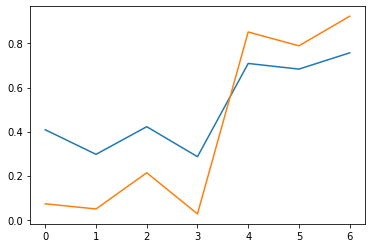

In [2]:
# n-armed bandit
input_values = 1
output_values = 7

# random probability distributions for training data
inputs = torch.eye(input_values)
target_distribution = torch.tensor(np.random.random_sample((output_values,))).float()

# single layer vanilla NN
weights = torch.rand(len(inputs),len(target_distribution)).requires_grad_()
optimizer = torch.optim.SGD([weights], lr=0.1)

def sample_distribution(true_distribution):
    return torch.ceil(true_distribution-np.random.random_sample((len(true_distribution),))).float()

# fitting target distribution in 50 epochs based on random samples (n-armed bandit)
for _ in range(50):
    optimizer.zero_grad()
    target = sample_distribution(target_distribution)
    pred = torch.sigmoid(inputs @ weights)
    loss = pred - target * torch.log(pred)
    loss.backward(gradient=torch.ones(len(inputs),len(target_distribution)))
    optimizer.step()

# target = orange; prediction = blue
results = np.array([pred[0].detach().numpy(),target_distribution.detach().numpy()]).T
plt.plot(results)

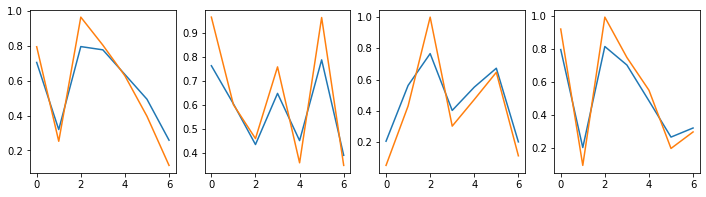

In [3]:
# contextual bandit
input_values = 4
output_values = 7

# random probability distributions for training data
inputs = torch.eye(input_values)
target_distributions = torch.rand(input_values,output_values)

# single layer vanilla NN
weights = torch.rand(input_values,output_values).requires_grad_()
optimizer = torch.optim.SGD([weights], lr=0.2)

def sample_distribution(true_distribution):
    return torch.ceil(true_distribution-torch.rand(len(true_distribution),len(true_distribution[0]))).float()

for _ in range(50):
    optimizer.zero_grad()

    # get samples/targets
    targets = sample_distribution(target_distributions)

    # feed forward
    pred = torch.sigmoid(inputs @ weights)

    # backprop
    loss = pred - targets * torch.log(pred)
    loss.backward(gradient=torch.ones(input_values,output_values))
    optimizer.step()

fig, axs = plt.subplots(1,input_values, figsize=(3*input_values, 3))
for index,item in enumerate(axs):
    item.plot(np.array([pred[index].detach().numpy(),target_distributions[index].numpy()]).T)

In [161]:
board = 64
king = 9

states = torch.eye(board)
rewards = torch.zeros(64)
rewards[0] = 1.0
moves = torch.tensor([
        [1,1],[1,0],[1,-1],
        [0,1],[0,0],[0,-1],
        [-1,1],[-1,0],[-1,-1]]).float()

weights = torch.rand(board,king).requires_grad_()
biases = torch.rand(king,).requires_grad_()
optimizer = torch.optim.SGD([weights,biases], lr=0.1)

def valid_move(x, h):
    return (
        x + h[0] + h[1]*8
        if (0 <= (x + h[0] + h[1]*8) < board) and ((x%8) == ((x + h[1]*8)%8)) and (torch.div(x,8, rounding_mode='trunc') == torch.div((x + h[0]),8, rounding_mode='trunc'))
        else x
        )
        
def valid_step(q,p):
    policies = torch.sigmoid(p @ weights + biases)
    choices = torch.tensor([prob.multinomial(num_samples=1) for prob in policies]).long()
    valid = torch.tensor([valid_move(n,choice) for n,choice in zip(q,moves[choices])]).long()
    return choices, valid

def samples(sts,t):
    v = [[valid_step((torch.zeros(board)+4).long(),states)[0],torch.arange(board)]]
    reward = [torch.sum(rewards[torch.tensor([[int(valid_move(n,m)) for m in moves] for n in v[-1][1]])],1).reshape((board,1))*torch.eye(king)[v[-1][0]]]

    for i in range(t):
        v.append(valid_step(v[-1][1],states[v[-1][1]]))
        reward.append(torch.sum(rewards[torch.tensor([[int(valid_move(n,m)) for m in moves] for n in v[-1][1]])],1).reshape((board,1))*torch.eye(king)[v[-1][0]] * (0.95**(i+1)))

    return reward[-1]


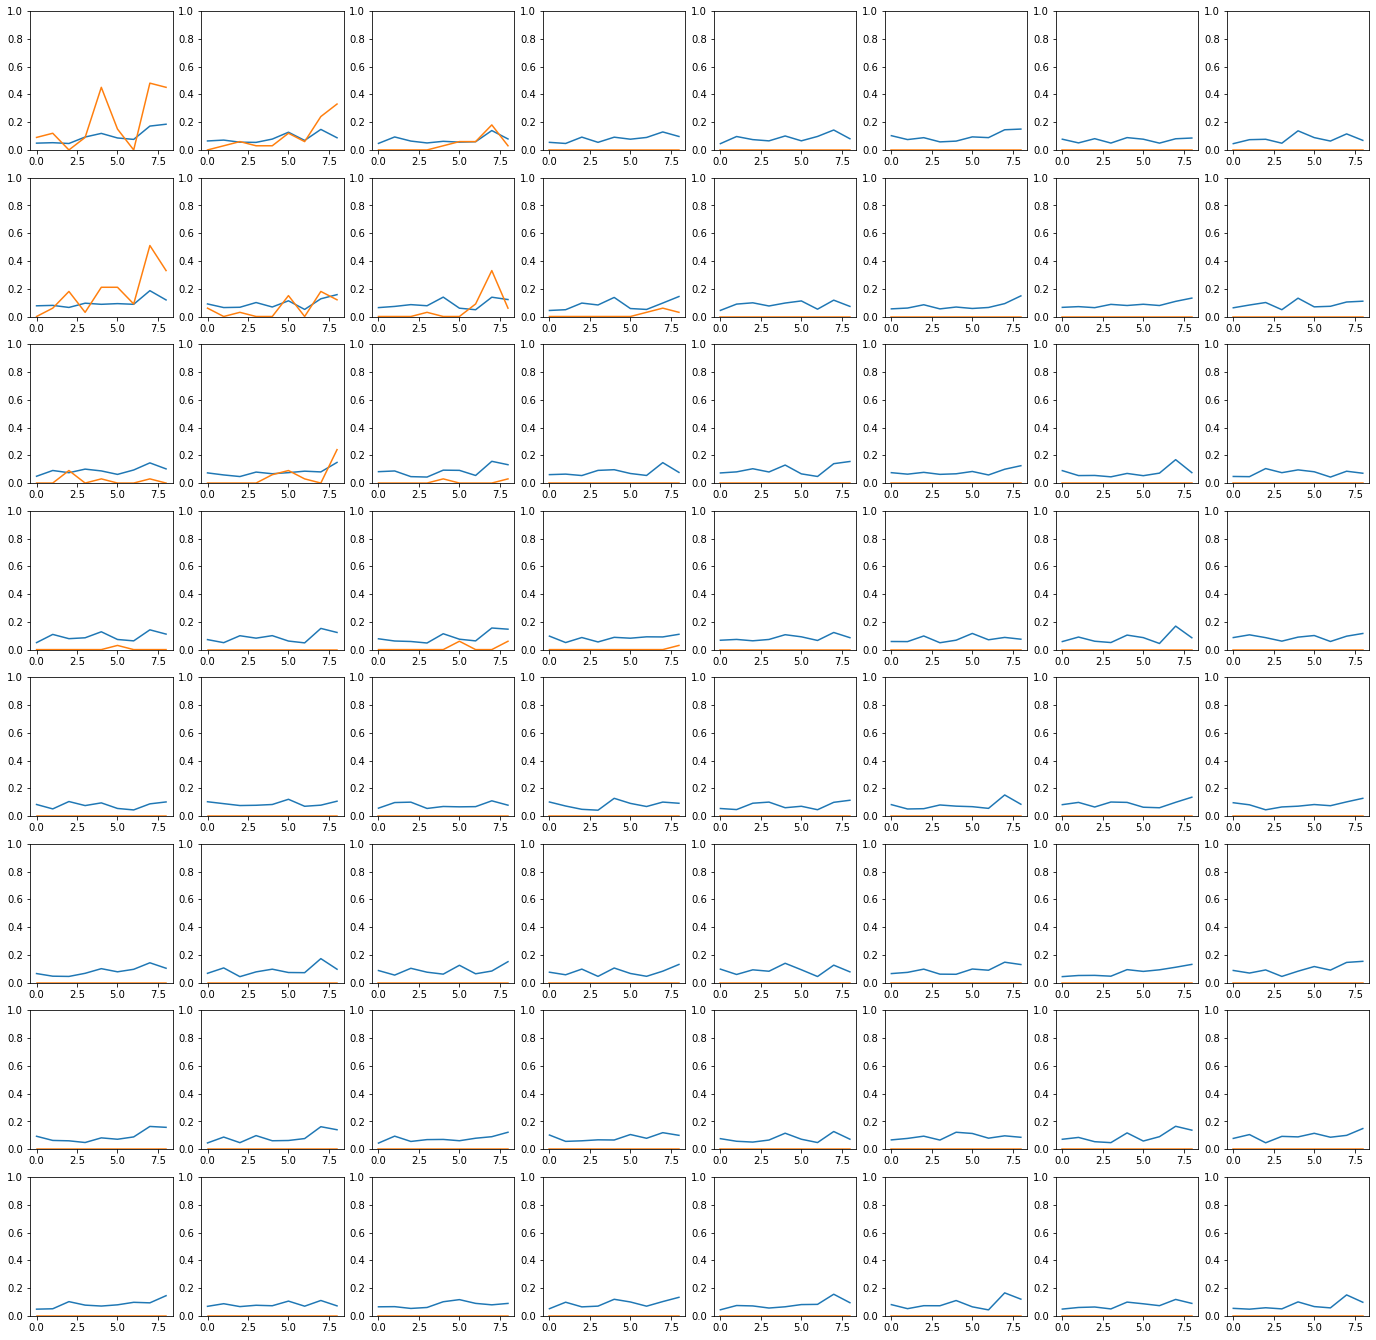

In [163]:

for _ in range(1):
    # get samples/targets
    targets = torch.mean(torch.stack([samples(states,2) for _ in range(30)]),0)
    x = states
    y = targets

    # training loop
    for _ in range(10):
        optimizer.zero_grad()

        # feed forward
        pred = torch.sigmoid(x @ weights + biases)

        # backprop
        loss = pred - y * torch.log(pred)
        loss.backward(gradient=loss)
        optimizer.step()

fig, axs = plt.subplots(8,8, figsize=(3*8, 3*8))
count = 0
for index in range(8):
    for index2 in range(8):
        axs[index][index2].set_ylim(0,1)
        axs[index][index2].plot(np.array([torch.sigmoid(states @ weights + biases)[count].detach().numpy(),y[count].detach().numpy()]).T)
        count += 1